In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
player_df = pd.read_csv('./data/player_data_04-2020.csv')
print(player_df.shape)
player_df = player_df.drop_duplicates(subset="Name")
print(player_df.shape)
player_df.head()

(2429, 41)
(2320, 41)


,Name,Equip1,Equip2,Equip3,Equip4,Equip5,Equip6,Equip7,Equip8,Equip9,...,Mining,Herblore,Agility,Thieving,Slayer,Farming,Runecrafting,Hunter,Construction,Location
0,Aweb0kz,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,60,1,1,1,1,1,1,1,1,ge
1,Popeye2018,-1,-1,1660,853,-1,-1,-1,1099,-1,...,83,1,10,1,1,1,30,1,1,ge
2,ImFatNotCute,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,41,30,25,20,63,17,9,1,1,ge
3,PappoSeco,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,41,1,1,1,1,1,1,1,1,ge
4,GB Justin,-1,-1,-1,1381,-1,-1,-1,-1,-1,...,1,1,37,19,33,1,1,1,27,ge


In [3]:
player_df.columns

Index(['Name', 'Equip1', 'Equip2', 'Equip3', 'Equip4', 'Equip5', 'Equip6',
       'Equip7', 'Equip8', 'Equip9', 'Equip10', 'Equip11', 'Equip12', 'Loc_x',
       'Loc_y', 'Anim_id', 'Overall', 'Attack', 'Defence', 'Strength',
       'Hitpoints', 'Ranged', 'Prayer', 'Magic', 'Cooking', 'Woodcutting',
       'Fletching', 'Fishing', 'Firemaking', 'Crafting', 'Smithing', 'Mining',
       'Herblore', 'Agility', 'Thieving', 'Slayer', 'Farming', 'Runecrafting',
       'Hunter', 'Construction', 'Location'],
      dtype='object')

In [4]:
player_df['Magic'].round(decimals=-1).value_counts().sort_index(ascending=True)

0      791
10     113
20     111
30     133
40     264
50     192
60     231
70     117
80     160
90     114
100     94
Name: Magic, dtype: int64

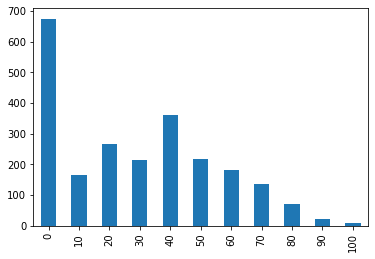

In [5]:
player_df['Mining'].round(decimals=-1).value_counts().sort_index(ascending=True).plot.bar()

In [6]:
ge_df = player_df.loc[player_df['Location'] == 'ge']

print(ge_df.shape)
ge_df.head()

(791, 41)


,Name,Equip1,Equip2,Equip3,Equip4,Equip5,Equip6,Equip7,Equip8,Equip9,...,Mining,Herblore,Agility,Thieving,Slayer,Farming,Runecrafting,Hunter,Construction,Location
0,Aweb0kz,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,60,1,1,1,1,1,1,1,1,ge
1,Popeye2018,-1,-1,1660,853,-1,-1,-1,1099,-1,...,83,1,10,1,1,1,30,1,1,ge
2,ImFatNotCute,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,41,30,25,20,63,17,9,1,1,ge
3,PappoSeco,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,41,1,1,1,1,1,1,1,1,ge
4,GB Justin,-1,-1,-1,1381,-1,-1,-1,-1,-1,...,1,1,37,19,33,1,1,1,27,ge


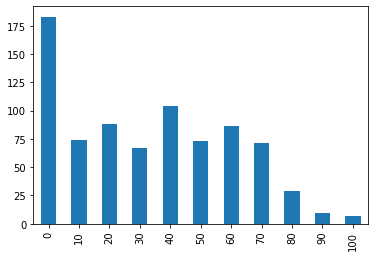

In [7]:
ge_df['Mining'].round(decimals=-1).value_counts().sort_index(ascending=True).plot.bar()

In [8]:
mining_df = player_df.loc[player_df['Location'] == 'mining']

print(mining_df.shape)
mining_df.head()

(370, 41)


,Name,Equip1,Equip2,Equip3,Equip4,Equip5,Equip6,Equip7,Equip8,Equip9,...,Mining,Herblore,Agility,Thieving,Slayer,Farming,Runecrafting,Hunter,Construction,Location
1435,Brad sux,1042,1021,1718,1273,-1,-1,-1,1011,-1,...,21,4,30,16,35,1,1,1,1,mining
1436,deme1994,1137,1019,1009,1265,1119,1189,-1,1067,-1,...,24,1,1,1,1,1,2,1,1,mining
1437,Prisco50,-1,-1,-1,1275,-1,-1,-1,-1,-1,...,61,1,1,1,1,1,1,1,1,mining
1438,TGIF2k20,1159,13679,1478,1329,1121,1197,-1,1071,-1,...,44,1,1,1,1,1,15,1,1,mining
1439,Webkinz138,1159,1007,-1,1265,1121,1197,-1,12289,-1,...,1,1,1,1,1,1,8,1,1,mining


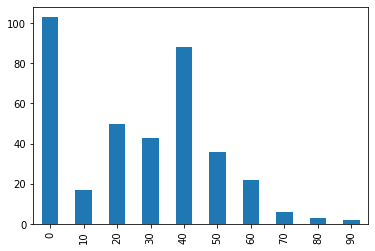

In [9]:
mining_df['Mining'].round(decimals=-1).value_counts().sort_index(ascending=True).plot.bar()

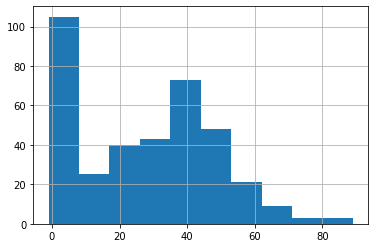

In [11]:
mining_df['Mining'].hist()

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\User\

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F023D74A90>,
      dtype=object)

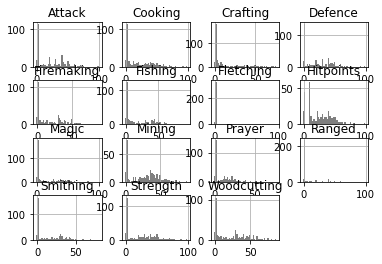

In [12]:
mining_df[['Attack', 'Defence', 'Strength','Hitpoints', 'Ranged', 'Prayer', 'Magic', 'Cooking', 'Woodcutting',\
           'Fletching', 'Fishing', 'Firemaking', 'Crafting', 'Smithing', 'Mining']].hist(color='k', alpha=0.5, bins=50)